<a href="https://colab.research.google.com/github/saurabhIU/Deep-Learning/blob/master/Problem1_A_Detailed_View_to_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation

In [0]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import warnings
import time
import os
warnings.filterwarnings('ignore')

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/MNIST_data", one_hot=True)

Extracting /tmp/data/MNIST_data/train-images-idx3-ubyte.gz
Extracting /tmp/data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
X_train, Y_train = mnist.train.images,mnist.train.labels
X_test, Y_test = mnist.test.images, mnist.test.labels
print (f'Total Training Images in Dataset {X_train.shape} , Total training label is {Y_train.shape}')
print (f'Total Test Images in Dataset {X_test.shape} , Total test label is {Y_test.shape}')

Total Training Images in Dataset (55000, 784) , Total training label is (55000, 10)
Total Test Images in Dataset (10000, 784) , Total test label is (10000, 10)


In [0]:
EPOCHS = 400
X = tf.placeholder("float", [None, 784])
Y = tf.placeholder("float", [None, 10])
layer_output = tf.placeholder("float", [None, 1024])
BATCH_SIZE = 10000

# Neural Network with 5 Layers each having 1024 units

In [0]:
def nn_model(data):
  
    layer1 = tf.layers.dense(data, 1024,activation=tf.nn.relu)
    layer2 = tf.layers.dense(layer1, 1024,activation=tf.nn.relu)
    layer3 = tf.layers.dense(layer2, 1024,activation=tf.nn.relu)
    layer4 = tf.layers.dense(layer3, 1024,activation=tf.nn.relu)
    logits = tf.layers.dense(layer4, 10)
    
    return logits,layer1,layer2,layer3,layer4


#Helper Functions

**1**  **Create mini-batch to feed to network**

**2**  **Grid Image plotting**

**3** **Calculate mean of samples each class**

**4** **Dimensionality Reduction - PCA and t-SNE**

**5** **Inverse of one hot encoding**

In [0]:
def get_input_batch(batch_size, data, labels):
    '''
    Return a total of `batch_size` random samples and labels. 
    '''
    index = np.random.choice(data.shape[0], batch_size)
    x = [data[i] for i in (index)]
    y = [labels[i] for i in (index)]
    return np.asarray(x), np.asarray(y)

def plot_img(data,prob_list):
  counter = { 0: 0, 1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0} 
  max_num_of_plot = 10
  fig, axes = plt.subplots(10, 10,figsize=(15,15))
  for index,prob in enumerate(prob_list):
    if (counter[prob] < max_num_of_plot):
      img = data[index].reshape(28,28)
      axes[prob,counter[prob]].imshow(img, cmap='viridis')
      counter[prob] +=1
  plt.show()

def single_image(data):
  img = data.reshape(28,28)
  plt.imshow(img,interpolation='nearest', cmap='seismic')

def get_mean_of_class(data,label):
  
  label_count = { 0: {'count': 0,'dataindex':[]},1: {'count': 0,'dataindex':[]}, \
                  2: {'count': 0,'dataindex':[]},3: {'count': 0,'dataindex':[]}, \
                  4: {'count': 0,'dataindex':[]},5: {'count': 0,'dataindex':[]}, \
                  6: {'count': 0,'dataindex':[]},7: {'count': 0,'dataindex':[]}, \
                  8: {'count': 0,'dataindex':[]},9: {'count': 0,'dataindex':[]}}
  
  for i in range(label.shape[0]):
    for j in label_count.keys():
      if (label[i] == j):
        label_count[j]['count'] +=1
        label_count[j]['dataindex'].append(i)
  
  means = np.zeros((10,2))
  
  for i in label_count.keys():
    mean_samples = np.zeros((label_count[i]['count'],2))
    for j in range(label_count[i]['count']):
      mean_samples[j] = data[label_count[i]['dataindex'][j]]
    means[i] = np.mean(mean_samples,axis =0)
    
  return means
  

def reduce_dimension(input_data,dim):
  pca = PCA(n_components=dim) # set the number of components to 2
  tsne_data=TSNE(n_components=dim).fit_transform(input_data)
  pca_data=pca.fit_transform(input_data)
  return pca_data,tsne_data

'''Decode one hot to integer representatio'''
def decode_labels(input_data):
  decoded_label = np.zeros((input_data.shape[0],1),dtype=int)
  for i in range(input_data.shape[0]):
    decoded_label[i] = np.argmax(input_data[i])
  return decoded_label

# Functions to calculate Cost, Optimizer,Prediction

In [0]:
logits,layer1_output,layer2_output,layer3_output,layer4_output = nn_model(X)
cost = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y,logits=logits)
optimizer = tf.train.AdamOptimizer().minimize(cost)
prediction = tf.nn.softmax(logits)
prediction_of_first_layer = tf.nn.softmax(layer1_output)
prediction_of_second_layer = tf.nn.softmax(layer2_output)
prediction_of_third_layer = tf.nn.softmax(layer3_output)
prediction_of_fourth_layer = tf.nn.softmax(layer4_output)
correct_prediction = tf.equal(tf.argmax(prediction, axis=1), tf.argmax(Y, axis=1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))



Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


# Train neural network 

In [0]:
sess =  tf.Session() 
    
sess.run(tf.global_variables_initializer())
  
tic = time.time()
for i in range(EPOCHS):
    x_batch, y_batch = get_input_batch(BATCH_SIZE,X_train,Y_train)
    c,_,acc = sess.run([cost, optimizer, accuracy],feed_dict={X: x_batch, Y: y_batch})
    if i % 100 == 0:
      print(f'Epoch: {i},training accuracy:{acc * 100}')
toc = time.time()
print(f'Time taken for training is {toc-tic}')
print(f'Test Accuracy is {sess.run(accuracy*100,feed_dict={X: X_test, Y: Y_test})}')

Epoch: 0,training accuracy:10.05999967455864
Epoch: 100,training accuracy:99.73999857902527
Epoch: 200,training accuracy:100.0
Epoch: 300,training accuracy:100.0
Time taken for training is 59.12104916572571
Test Accuracy is 98.22000122070312


# Problem 3 Steps:

**1) Capture output **

**2) For each 10-d output vector, find the dim with the maximum probability**

**3) Plot the input image associated with that in a 10X10 grid of subplots with first 10 samples for each class**

In [0]:
BATCH_SIZE = 1000
x_batch, y_batch = get_input_batch(BATCH_SIZE,X_train,Y_train)
print(x_batch.shape)
output = sess.run(prediction,feed_dict={X: x_batch, Y: y_batch})

(1000, 784)


**Calculate maximum Probability for each sample**

In [0]:
max_prob = [np.argmax(output[i]) for i in range(output.shape[0])]

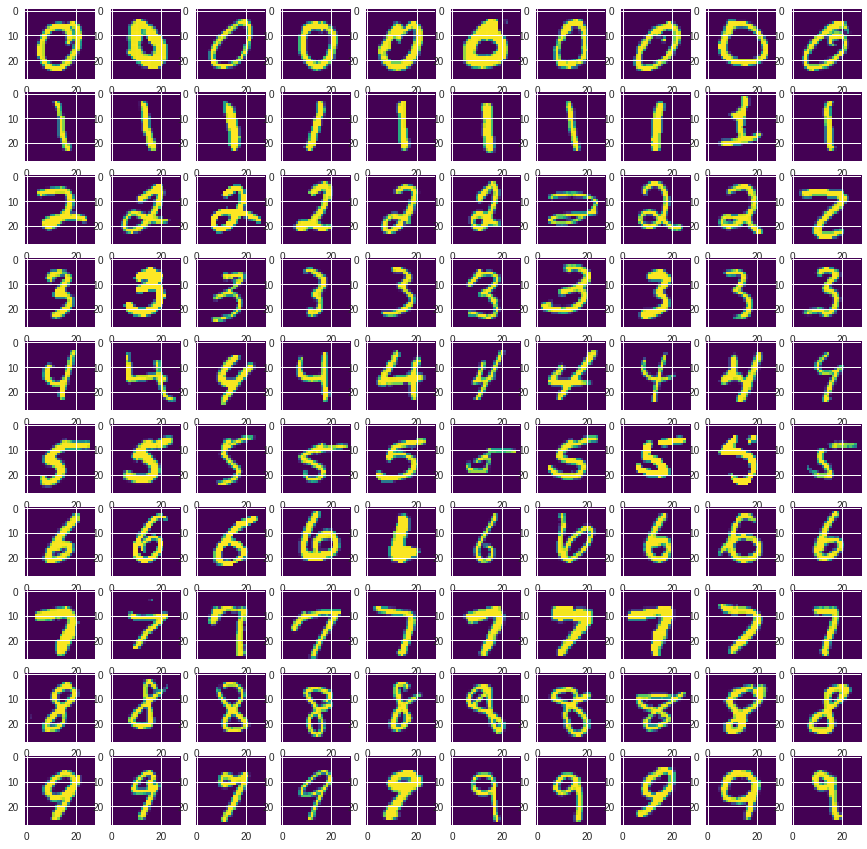

In [0]:
plot_img(x_batch,max_prob)

# Problem 4 Steps:

**1) Capture output of Last Layer**

**2) Choose 10 random dimensions out of 1024 dimensions**

**3) For each 10-d output vector, find the dim with the maximum probability**

**4) Plot the input image associated with that in a grid of subplots**
  

In [0]:
BATCH_SIZE = 1000
x_batch, y_batch = get_input_batch(BATCH_SIZE,X_train,Y_train)
print(x_batch.shape)
last_layer_pediction = sess.run(prediction_of_fourth_layer,feed_dict={X: x_batch})

(1000, 784)


In [0]:
'''Choose 10 random dimensions from 1024 dimensions'''
rand_dim = np.random.choice(1024, 10)
'''Define an array of size 1000X10'''
last_layer_output = np.zeros((last_layer_pediction.shape[0],10))

for j in range(last_layer_pediction.shape[0]):
  row_vector = [last_layer_pediction[j][i] for i in (rand_dim)]
  last_layer_output[j] = np.asarray(row_vector)
'''Calcuklate maximum probability'''
max_prob_last_layer = [np.argmax(last_layer_output[i]) for i in range(last_layer_output.shape[0])]
  

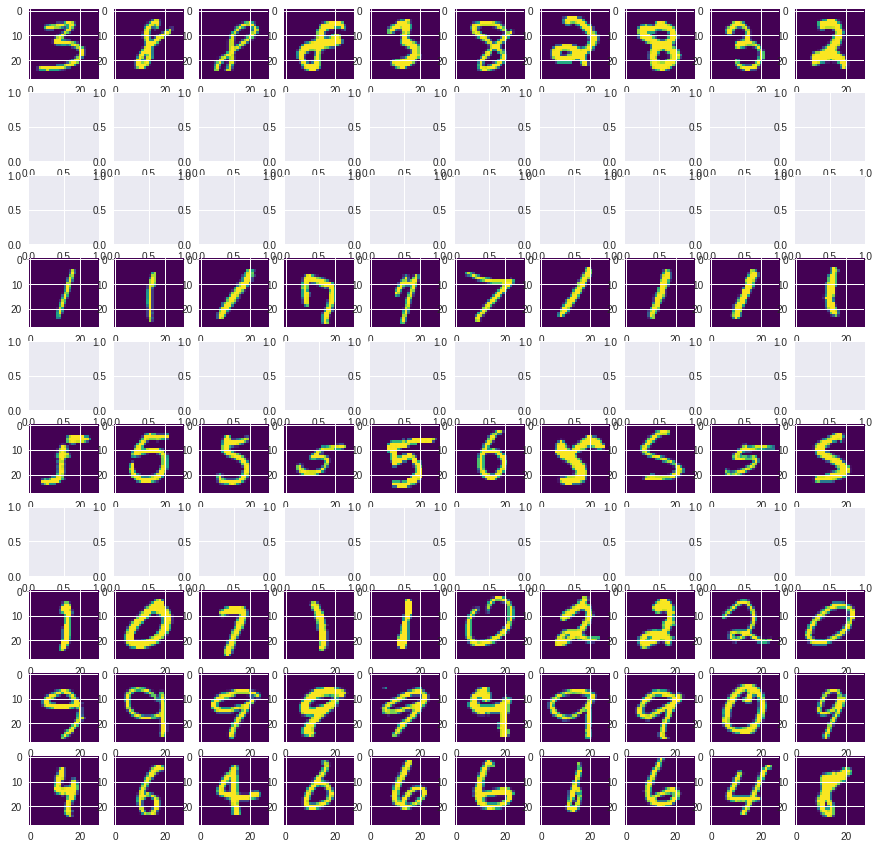

In [0]:
plot_img(x_batch,max_prob_last_layer)

# Observation:

Above graph shows that how random neurons are firing with different values and final output is the weighted sum of each unit activation output. Some random neurons are not even firing or activated hence showing blank images. For all the neurons which were not activated simply means that the weighted input to those neurons from previous layer didn't activate them.

# Problem 6

In [0]:
BATCH_SIZE = 1000
class_marker = ['0','1','2','3','4','5','6','7','8','9','10']
x_batch, y_batch = get_input_batch(BATCH_SIZE,X_train,Y_train)
decoded_label = decode_labels(y_batch)

# Plot Scatter Plot on PCA and TSNE transformation of raw data 

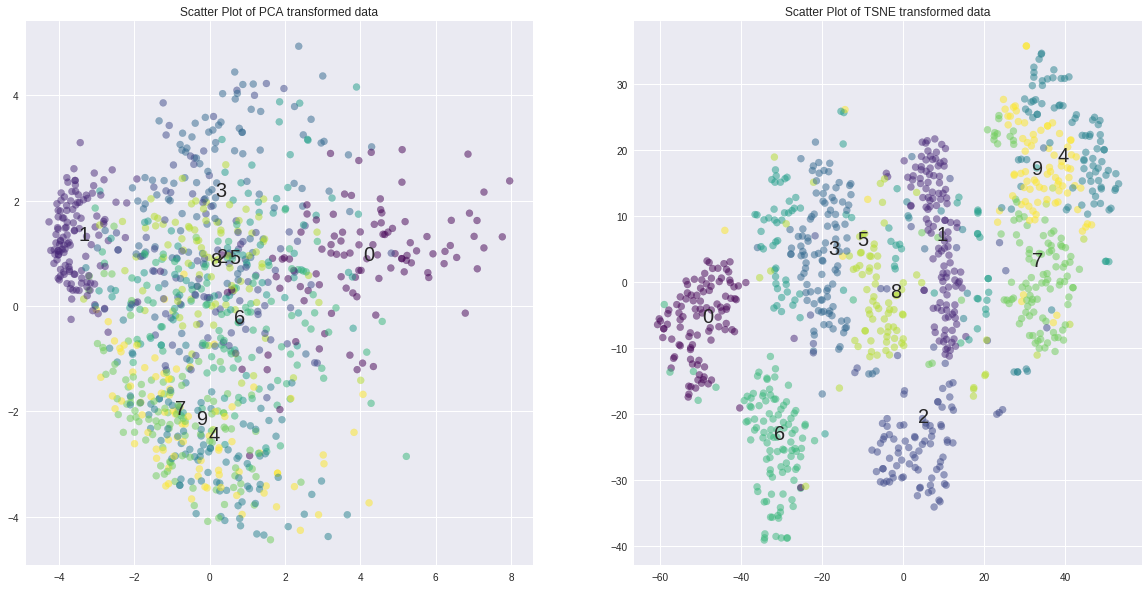

In [0]:
x_batch_pca , _ = reduce_dimension(x_batch,2)
pca_class_means = get_mean_of_class(x_batch_pca,decoded_label[:,0])
_, x_batch_tsne  = reduce_dimension(x_batch,2)
tsne_class_means = get_mean_of_class(x_batch_tsne,decoded_label)


plt.figure(figsize=(20,10))
plt.subplot(121)
plt.scatter(x_batch_pca[:,0], x_batch_pca[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)

for i,j in zip(class_marker,pca_class_means):
    plt.text(j[0], j[1], i, fontsize=20)
plt.title("Scatter Plot of PCA transformed data")


plt.subplot(122)
plt.scatter(x_batch_tsne[:,0], x_batch_tsne[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,tsne_class_means):
    plt.text(j[0], j[1], i, fontsize=20)
plt.title("Scatter Plot of TSNE transformed data")


plt.show()

# Observation:

1.  Above graph shows that the data points can't be linearly classified
2.  As data points are quite overlapping, its difficult to classify them
3. PCA doesn't help much but t-SNE is quite better and isolates different clusters
4. A good non-linear algorithm can classify t-SNE transformed data with better accuracy

# Problem 7 & 8


In [0]:
BATCH_SIZE = 1000
x_batch, y_batch = get_input_batch(BATCH_SIZE,X_train,Y_train)

first_layer_pediction = sess.run(prediction_of_first_layer,feed_dict={X: x_batch})
second_layer_pediction = sess.run(prediction_of_second_layer,feed_dict={X: x_batch})
third_layer_pediction = sess.run(prediction_of_third_layer,feed_dict={X: x_batch})
fourth_layer_pediction = sess.run(prediction_of_fourth_layer,feed_dict={X: x_batch})
prediction_of_last_layer = sess.run(prediction,feed_dict={X: x_batch})
decoded_label = decode_labels(y_batch)

In [0]:
'''PCA and TSNE for Layer1'''
pca1 , _ = reduce_dimension(first_layer_pediction,2)
pca1_means = get_mean_of_class(pca1,decoded_label[:,0])
_, tsne1  = reduce_dimension(first_layer_pediction,2)
tsne1_means = get_mean_of_class(tsne1,decoded_label)

'''PCA and TSNE for Layer2'''

pca2 , _ = reduce_dimension(second_layer_pediction,2)
pca2_means = get_mean_of_class(pca2,decoded_label[:,0])
_, tsne2  = reduce_dimension(second_layer_pediction,2)
tsne2_means = get_mean_of_class(tsne2,decoded_label)


'''PCA and TSNE for Layer3'''

pca3 , _ = reduce_dimension(third_layer_pediction,2)
pca3_means = get_mean_of_class(pca3,decoded_label[:,0])
_, tsne3  = reduce_dimension(third_layer_pediction,2)
tsne3_means = get_mean_of_class(tsne3,decoded_label)

'''PCA and TSNE for Layer4'''

pca4 , _ = reduce_dimension(fourth_layer_pediction,2)
pca4_means = get_mean_of_class(pca4,decoded_label[:,0])
_, tsne4  = reduce_dimension(fourth_layer_pediction,2)
tsne4_means = get_mean_of_class(tsne4,decoded_label)

'''PCA and TSNE for Last Layer'''

pca5 , _ = reduce_dimension(prediction_of_last_layer,2)
pca5_means = get_mean_of_class(pca5,decoded_label[:,0])
_, tsne5  = reduce_dimension(prediction_of_last_layer,2)
tsne5_means = get_mean_of_class(tsne5,decoded_label)

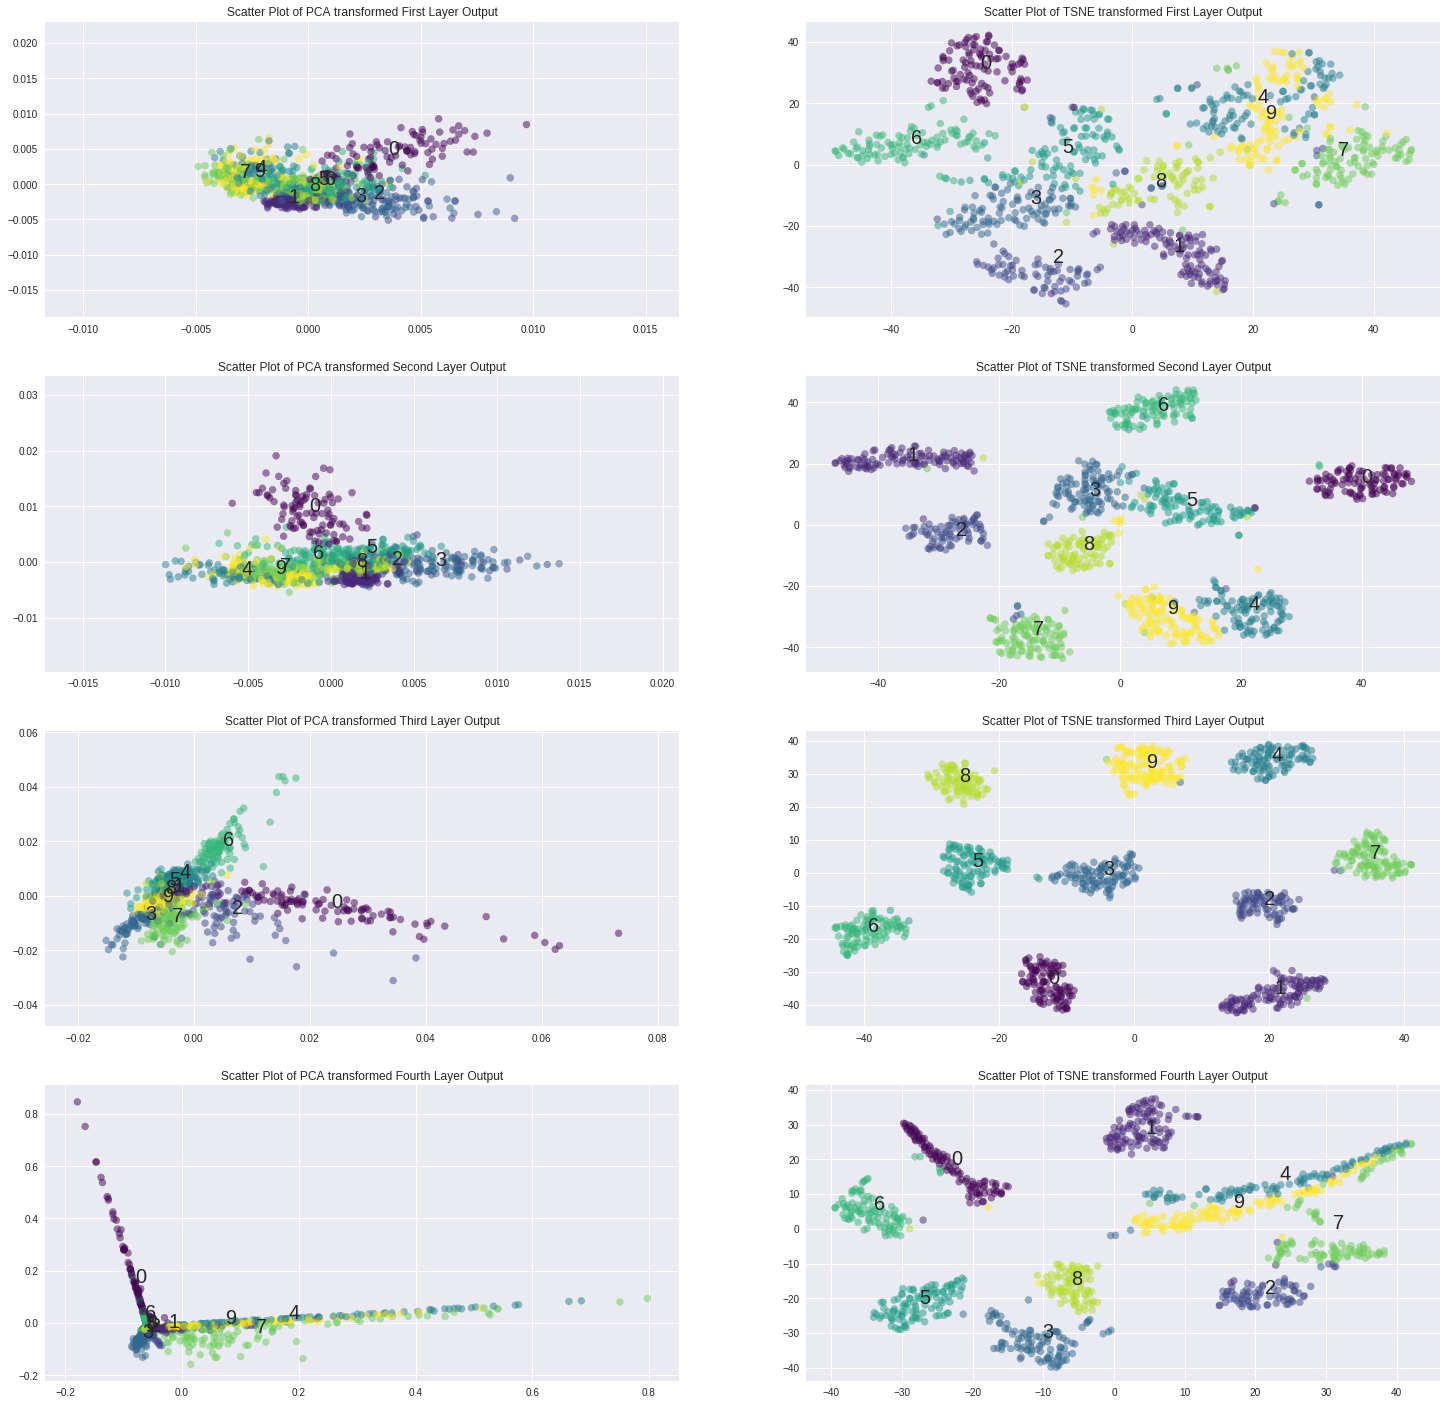

In [0]:
plt.figure(figsize=(25,25))

plt.subplot(421)
plt.scatter(pca1[:,0], pca1[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,pca1_means):
    plt.text(j[0], j[1], i, fontsize=20)
plt.title("Scatter Plot of PCA transformed First Layer Output")


plt.subplot(422)
plt.scatter(tsne1[:,0], tsne1[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,tsne1_means):
    plt.text(j[0], j[1], i, fontsize=20)
plt.title("Scatter Plot of TSNE transformed First Layer Output")

plt.subplot(423)
plt.scatter(pca2[:,0], pca2[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,pca2_means):
    plt.text(j[0], j[1], i, fontsize=20)
plt.title("Scatter Plot of PCA transformed Second Layer Output")


plt.subplot(424)
plt.scatter(tsne2[:,0], tsne2[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,tsne2_means):
    plt.text(j[0], j[1], i, fontsize=20)
plt.title("Scatter Plot of TSNE transformed Second Layer Output")

plt.subplot(425)
plt.scatter(pca3[:,0], pca3[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,pca3_means):
    plt.text(j[0], j[1], i, fontsize=20)
plt.title("Scatter Plot of PCA transformed Third Layer Output")


plt.subplot(426)
plt.scatter(tsne3[:,0], tsne3[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,tsne3_means):
    plt.text(j[0], j[1], i, fontsize=20)
plt.title("Scatter Plot of TSNE transformed Third Layer Output")

plt.subplot(427)
plt.scatter(pca4[:,0], pca4[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,pca4_means):
    plt.text(j[0], j[1], i, fontsize=20)
plt.title("Scatter Plot of PCA transformed Fourth Layer Output")


plt.subplot(428)
plt.scatter(tsne4[:,0], tsne4[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)
for i,j in zip(class_marker,tsne4_means):
    plt.text(j[0], j[1], i, fontsize=20)
plt.title("Scatter Plot of TSNE transformed Fourth Layer Output")




plt.show()

Text(0.5, 1.0, 'Scatter Plot of TSNE transformed data of final prediction')

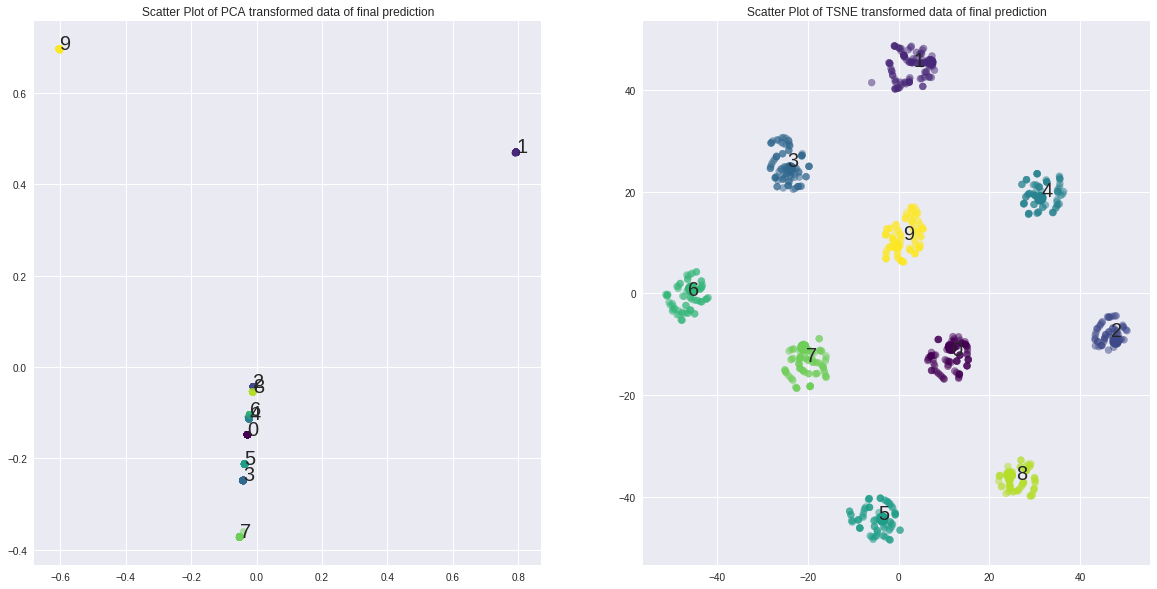

In [0]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.scatter(pca5[:,0], pca5[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)

for i,j in zip(class_marker,pca5_means):
    plt.text(j[0], j[1], i, fontsize=20)
plt.title("Scatter Plot of PCA transformed data of final prediction")


plt.subplot(122)
plt.scatter(tsne5[:,0], tsne5[:,1],c=decoded_label[:,0],cmap='viridis',alpha=0.5)

for i,j in zip(class_marker,tsne5_means):
    plt.text(j[0], j[1], i, fontsize=20)
plt.title("Scatter Plot of TSNE transformed data of final prediction")

# Observation:

1.  PCA transformation is not helping much
2.  As more layers are added, each layer seems to be contributing to accuracy
3. Deeper layer outputs give better representation of output classes
4. t-SNE and more layers are great for this particular classification
5. As more layers are added, class clusters are more grouped separable